In [1]:
from keras.datasets import cifar10
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train=x_train[np.where(y_train==5)[0],]
y_train=y_train[np.where(y_train==5)[0]]
x_test=x_test[np.where(y_test==5)[0],]
y_test=y_test[np.where(y_test==5)[0]]

In [4]:
print(x_train.shape)
print(x_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)


In [5]:
m = max(x_train.flatten())
print(m)
x_train = x_train/m
x_test = x_test/m
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

255
(5000, 3072)
(1000, 3072)


In [6]:
# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
hidden_units = 512
#learning_rate=0.01
#weight_decay=0.95
#(1-weight_decay)/learning_rate
#regul=regularizers.l2(0.01)
# this is our input placeholder
input_img = Input(shape=(3072,))

# "encoded" is the encoded representation of the input
x1 = Dense(hidden_units, activation='linear')(input_img)
x2 = Dense(hidden_units, activation='sigmoid')(x1)
x3 = Dense(hidden_units, activation='sigmoid')(x2)
x4 = Dense(hidden_units, activation='sigmoid')(x3)
encoded = Dense(encoding_dim, activation='sigmoid')(x4)

# "decoded" is the lossy reconstruction of the input
y1 = Dense(hidden_units, activation='sigmoid')(encoded)
y2 = Dense(hidden_units, activation='sigmoid')(y1)
y3 = Dense(hidden_units, activation='sigmoid')(y2)
decoded = Dense(3072, activation='sigmoid')(y3)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [7]:
encoder = Model(input_img, encoded)

In [8]:
# create a placeholder for an encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layers of the autoencoder model
decoder_layer1 = autoencoder.layers[-4](encoded_input)
decoder_layer2 = autoencoder.layers[-3](decoder_layer1 )
decoder_layer3 = autoencoder.layers[-2](decoder_layer2 )
decoder_layer4 = autoencoder.layers[-1](decoder_layer3 )
# create the decoder model
decoder = Model(encoded_input, decoder_layer4)

In [9]:
#sgd = optimizers.SGD(lr=0.01)
autoencoder.compile(optimizer="adadelta", loss='mean_squared_error')

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=(400*120)//5000+1,
                batch_size=120,
                shuffle=True,
                validation_data=(x_test, x_test))



Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 873us/step - loss: 0.0672 - val_loss: 0.0660
Epoch 2/10
5000/5000 [==============================] - 3s 690us/step - loss: 0.0647 - val_loss: 0.0642
Epoch 3/10
5000/5000 [==============================] - 3s 691us/step - loss: 0.0632 - val_loss: 0.0631
Epoch 4/10
5000/5000 [==============================] - 4s 735us/step - loss: 0.0622 - val_loss: 0.0624
Epoch 5/10
5000/5000 [==============================] - 4s 727us/step - loss: 0.0616 - val_loss: 0.0620
Epoch 6/10
5000/5000 [==============================] - 4s 775us/step - loss: 0.0612 - val_loss: 0.0617
Epoch 7/10
5000/5000 [==============================] - 4s 737us/step - loss: 0.0609 - val_loss: 0.0615
Epoch 8/10
5000/5000 [==============================] - 4s 727us/step - loss: 0.0607 - val_loss: 0.0614
Epoch 9/10
5000/5000 [==============================] - 4s 719us/step - loss: 0.0606 - val_loss: 0.0614
Epoch 10/10
50

In [11]:
autoencoder.evaluate(x_test, x_test)

1000/1000 [==============================] - 0s 276us/step


0.061359957098960874

In [12]:
x_test.shape

(1000, 3072)

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
encoded_imgs.shape

(1000, 64)

In [14]:
encoded_imgs[0]

array([0.49578428, 0.5944806 , 0.5514058 , 0.58586144, 0.283439  ,
       0.34928876, 0.5826733 , 0.6299073 , 0.7797759 , 0.50883734,
       0.7280519 , 0.55145425, 0.5193663 , 0.56664896, 0.74516106,
       0.42633116, 0.5652197 , 0.536875  , 0.5607106 , 0.6737611 ,
       0.44541872, 0.5098812 , 0.3971266 , 0.3525973 , 0.7561842 ,
       0.5919066 , 0.33153188, 0.6423144 , 0.3852397 , 0.66457605,
       0.40167165, 0.7119063 , 0.61502975, 0.52003187, 0.42085266,
       0.5113183 , 0.7318413 , 0.3870432 , 0.57545584, 0.48157448,
       0.6705413 , 0.7664868 , 0.51621443, 0.24644381, 0.5007513 ,
       0.5199523 , 0.38569814, 0.5825246 , 0.65354526, 0.29888684,
       0.7658221 , 0.3634699 , 0.78455853, 0.62820774, 0.49716386,
       0.3882094 , 0.4022666 , 0.5184251 , 0.23482028, 0.53926915,
       0.45012003, 0.633097  , 0.630264  , 0.33386832], dtype=float32)

In [15]:
decoded_imgs[0]

array([0.43835402, 0.42952695, 0.37832937, ..., 0.4769195 , 0.4643607 ,
       0.42415717], dtype=float32)

In [17]:
a=autoencoder.predict(x_test[1].reshape(1, 3072))

In [18]:
a

array([[0.43835518, 0.42952695, 0.3783293 , ..., 0.47691807, 0.46435836,
        0.42415878]], dtype=float32)

In [19]:
x_test[1]

array([0.37254902, 0.29803922, 0.30588235, ..., 0.08627451, 0.04313725,
       0.10980392])

In [20]:
a[0].shape

(3072,)

In [21]:
import matplotlib.pyplot as plt

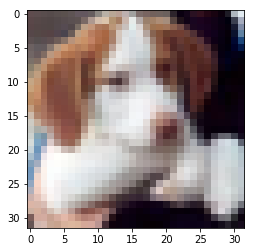

In [22]:
plt.imshow(x_test[1].reshape(32, 32, 3))

In [27]:
type(x_test[1])

numpy.ndarray

In [31]:
import matplotlib
matplotlib.image.imsave('dog1.png', x_test[1].reshape(32, 32, 3))

In [23]:
sum(sum((a-x_test[1])**2))

263.8540506352998

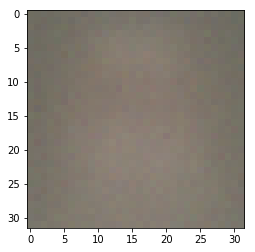

In [24]:
plt.imshow(a.reshape(32, 32, 3))

In [30]:
matplotlib.image.imsave('dog2.png', a.reshape(32, 32, 3))

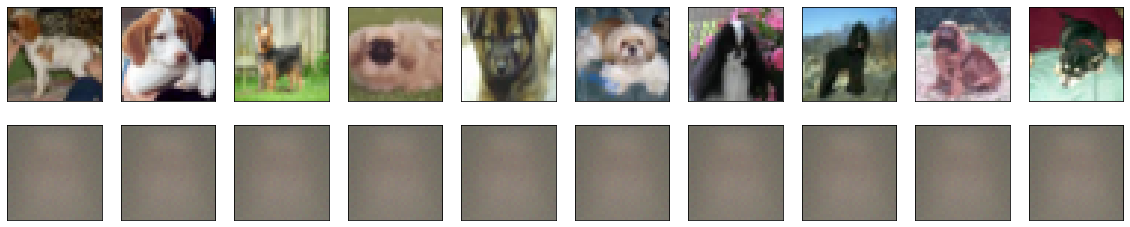

In [25]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()